<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/main/weather_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#데이터 준비

import pandas as pd

df = pd.read_csv("/content/sample_data/weather.csv")
df  # print(df) 와 동일

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [22]:
# 결측치 확인
df.isnull().sum()

# 결측치 제거
df = df.dropna()
df.isnull().sum()

df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [23]:
# 데이터 불러오기

X = df.drop('RainTomorrow', axis=1) # 입력 데이터 (features)
y = df['RainTomorrow'] # 정답 데이터 (target)


X = X.select_dtypes(include=np.number)

# 데이터를 훈련 데이터와 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#분류 모델 학습
# 스무고개 처럼 정답 예측
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
# 랜덤포레스트
# 대표적인 앙상블
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

ry_preds = model.predict(X_test)
print('Accuracy Score', accuracy_score(ry_preds, y_test))

Accuracy Score 1.0


In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# 선형회귀
model = LinearRegression()

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

model.fit(X_train, y_train_encoded)

preds = model.predict(X_test) # 예측 수행

데이터를 시각화하는 중...


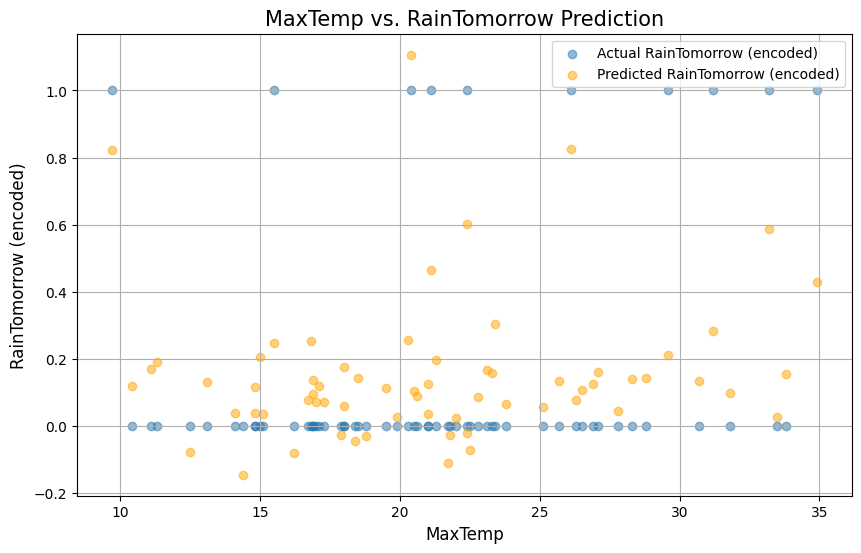

In [28]:
# 시각화 (산점도)

print("데이터를 시각화하는 중...")
plt.figure(figsize=(10, 6))

plt.scatter(X_test['MaxTemp'], y_test_encoded, label='Actual RainTomorrow (encoded)', alpha=0.5)

# Use 'MaxTemp' from X_test as the x-axis for plotting the predictions
plt.scatter(X_test['MaxTemp'], preds, color='orange', label='Predicted RainTomorrow (encoded)', alpha=0.5)

# 그래프 제목 및 축 레이블 설정
plt.title('MaxTemp vs. RainTomorrow Prediction', fontsize=15)
plt.xlabel('MaxTemp', fontsize=12)
plt.ylabel('RainTomorrow (encoded)', fontsize=12)
plt.legend()
plt.grid(True)


plt.show()

In [30]:
mse = mean_squared_error(y_test_encoded, preds) # Changed y_test to y_test_encoded
print(f"\n모델의 평균 제곱 오차 (MSE): {mse:.4f}")


모델의 평균 제곱 오차 (MSE): 0.0544
